In [1]:
import os
import sys
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tifffile import imread
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible

from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
from stardist.models import StarDist2D

np.random.seed(6)
lbl_cmap = random_label_cmap()

In [2]:
model = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [3]:
from skimage.filters import gaussian

In [4]:
import re

In [5]:
nuclei_files = sorted(glob('/nas_storage/andreas.ettinger/data/img/project_agv/single_tiffs/*Ch0*.tiff'))
done_files = map(lambda x: os.path.basename(x).split('-labels')[0],sorted(glob('/nas_storage/andreas.ettinger/output/project_agv/stardist_segmentation/*.tiff')))

In [7]:
list(done_files)

[]

In [11]:
# os.makedirs('/nas_storage/andreas.ettinger/output/project_agv/stardist_segmentation')

In [84]:
# os.makedirs('/nas_storage/andreas.ettinger/output/project_agv/processing_output/segmentation')

In [8]:
axis_norm = (0,1)

In [9]:
testimage = imread(nuclei_files[600])

In [10]:
import random

In [11]:
len(nuclei_files)

1610

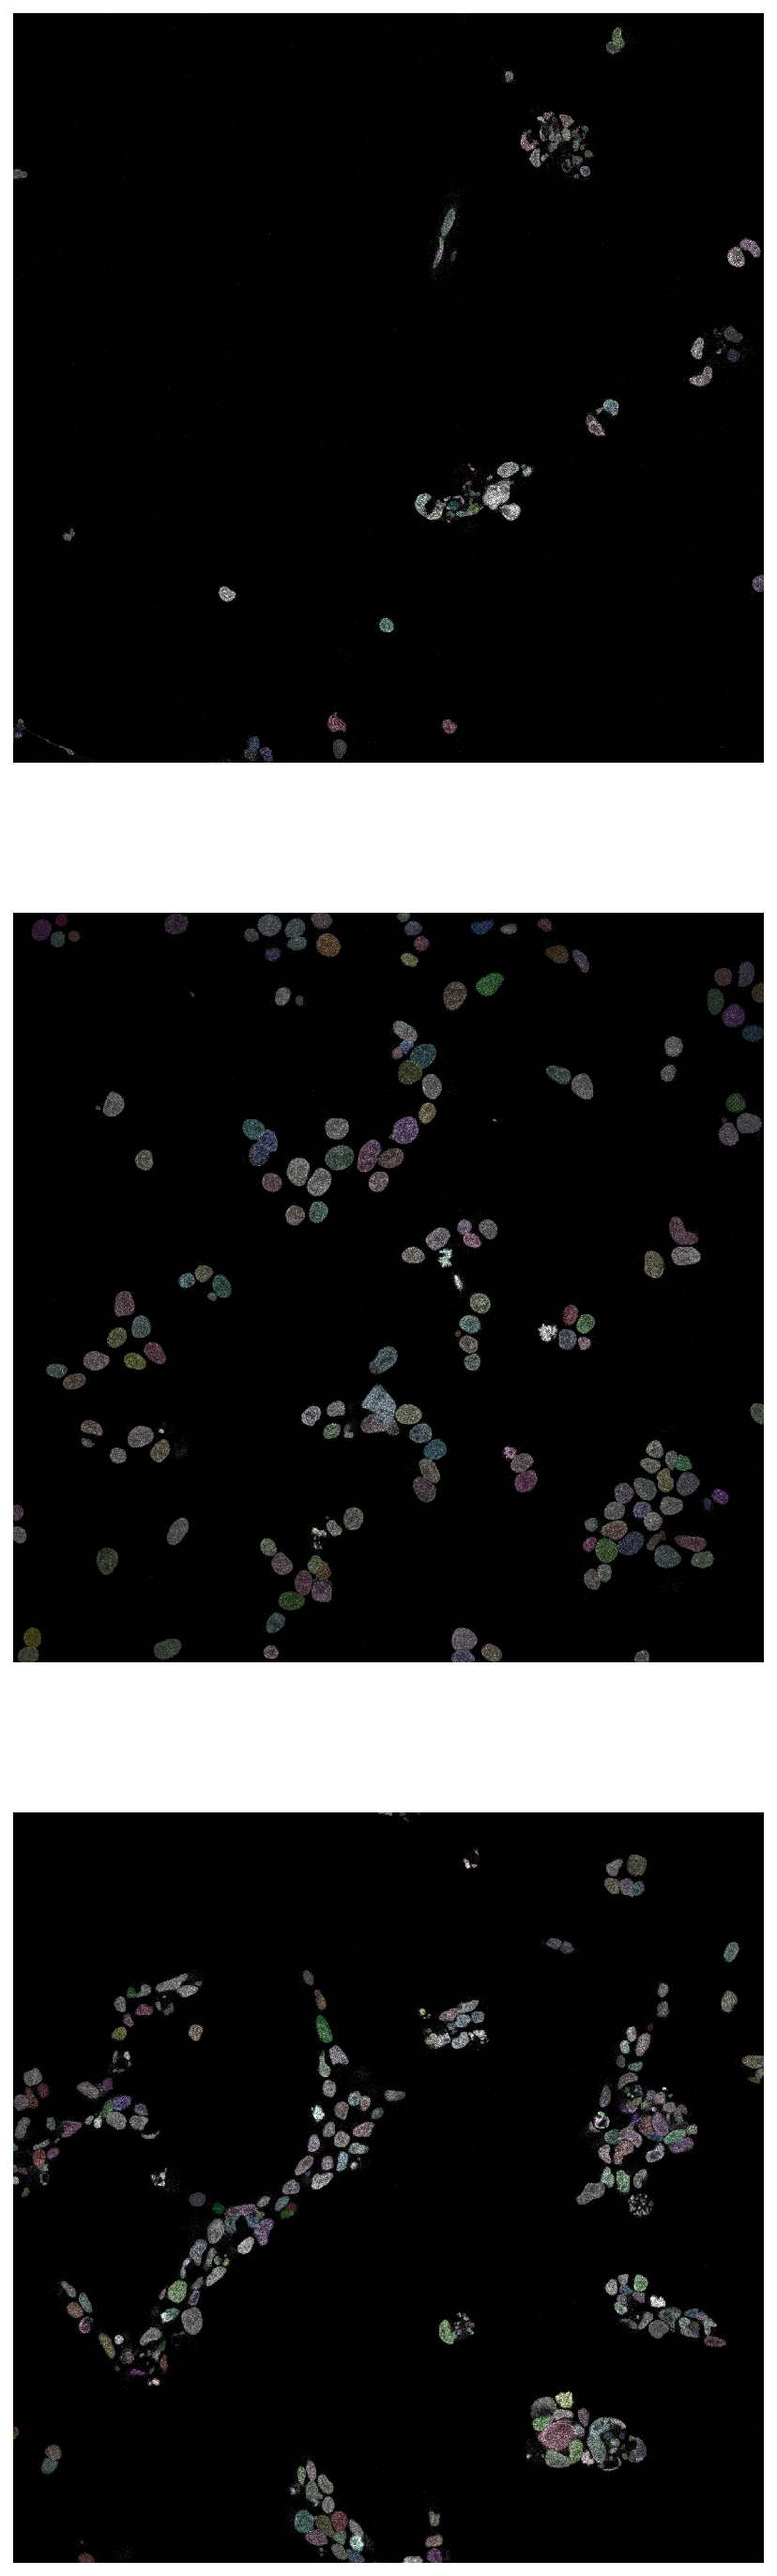

In [13]:
fig, ax = plt.subplots(3,1,figsize=(20,25))
for i in range(3):
    selected_image = imread(nuclei_files[random.randint(0,len(nuclei_files))])
    img = normalize(selected_image, 1,99.8, axis=axis_norm)
    labels, details = model.predict_instances(img)
    ax[i].imshow(img, cmap='gray', vmin=img.min(), vmax=img.max()-0.35*img.max())
    ax[i].imshow(labels, cmap=lbl_cmap, alpha=0.2)
    ax[i].axis('off')

In [14]:
testimage_g = gaussian(testimage, sigma=3)
img = normalize(testimage, 1,99.8, axis=axis_norm)
labels, details = model.predict_instances(img)

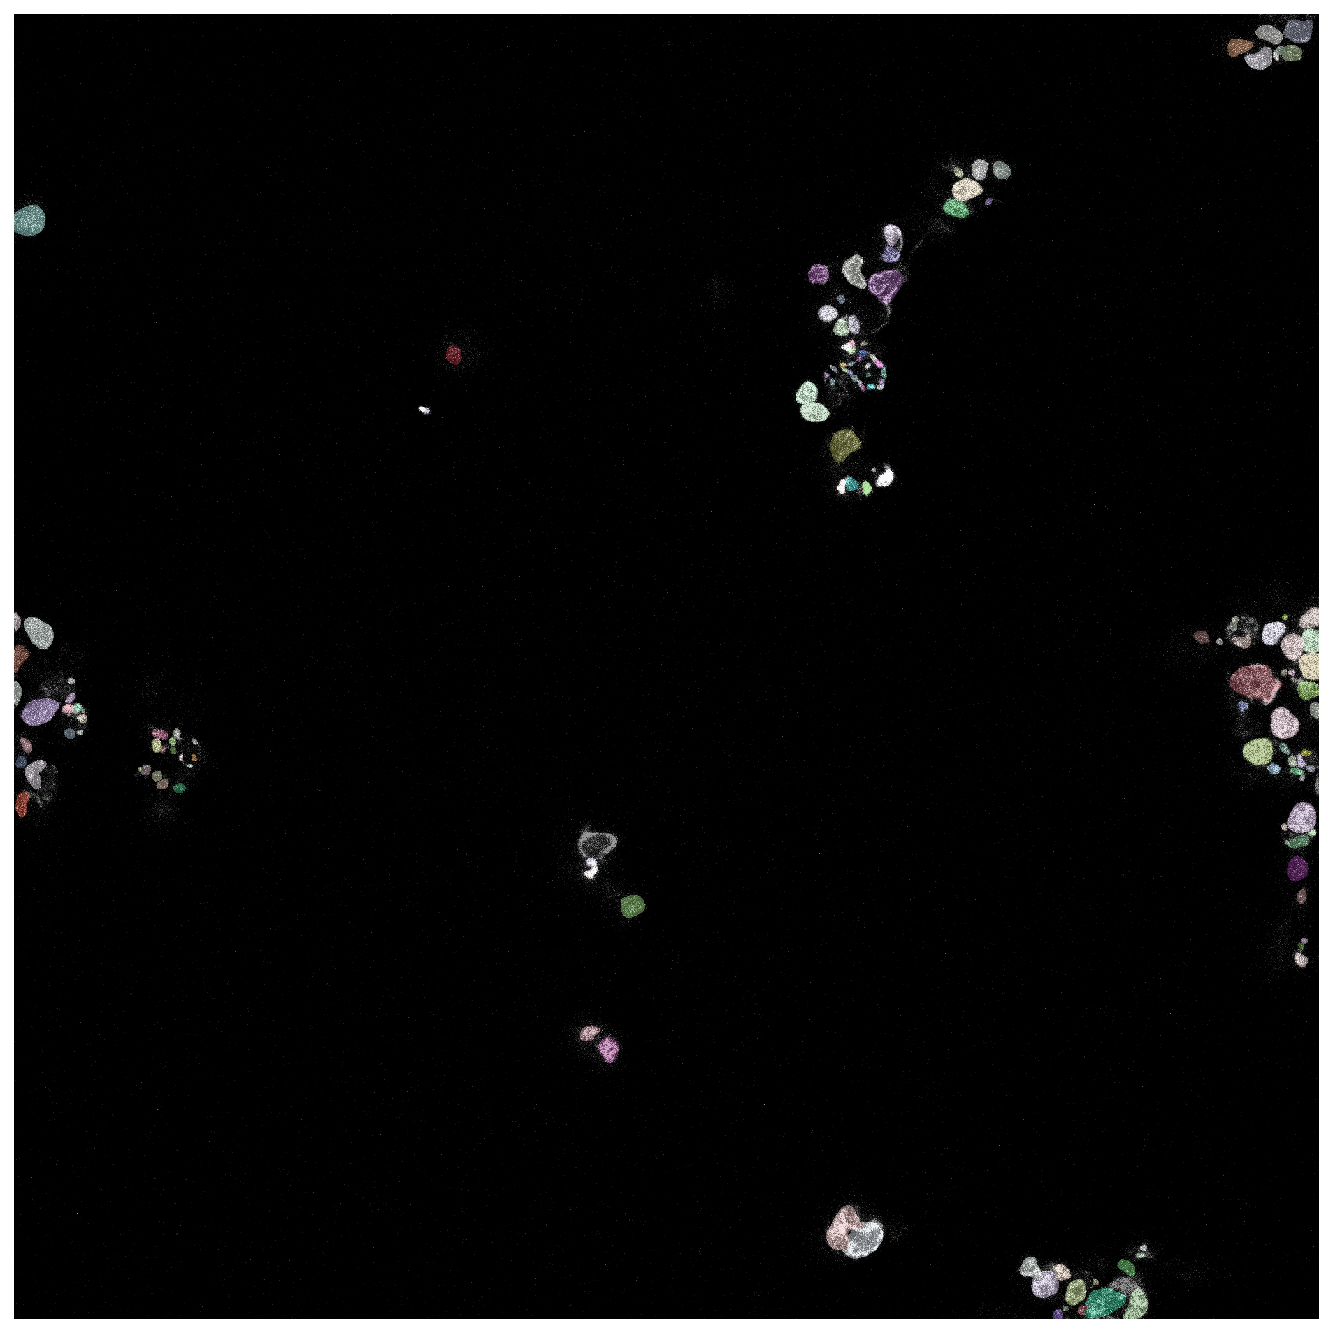

In [15]:
plt.figure(figsize=(12,12))
plt.imshow(img if img.ndim==2 else img[...,0], clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.4)
plt.axis('off');

In [83]:
'test.tif'.split('.')[0] + ".png"

'test.png'

In [ ]:
# loop and save label images
for nuclei in nuclei_files:
    label_name = os.path.basename(nuclei).split('.')[0]
    if label_name not in list(done_files):
        img = imread(nuclei)
        img = normalize(img, 1,99.8, axis=axis_norm)
        labels, details = model.predict_instances(img)
        
        png_name = label_name + "-nuclei.png"
        label_name = label_name + "-labels.tiff"
        # save overlay
        plt.figure(figsize=(12,12))
        plt.imshow(img if img.ndim==2 else img[...,0], clim=(0,1), cmap='gray')
        plt.imshow(labels, cmap=lbl_cmap, alpha=0.4)
        plt.title(png_name)
        plt.axis('off')
        plt.savefig(os.path.join('/nas_storage/andreas.ettinger/output/project_agv/processing_output/segmentation/',png_name))
        plt.close()
        # save labels
        save_tiff_imagej_compatible(os.path.join('/nas_storage/andreas.ettinger/output/project_agv/stardist_segmentation/',label_name), labels, axes='YX')

/home/ies/andreas.ettinger/anaconda3/envs/stardist/lib/python3.8/site-packages/csbdeep/io/__init__.py:40: UserWarning: Converting data type from 'int32' to ImageJ-compatible 'int16'.
  warnings.warn("Converting data type from '%s' to ImageJ-compatible '%s'." % (t, np.dtype(t_new)))
